In [71]:
import pandas as pd
from os import listdir
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [3]:

dir = listdir("C:/Users/Thiago/Documents/GitHub/TCC-Previsor_viagens_onibus/Final/TratamentoFloripa")

dir.remove('tratamento_floripa.ipynb')

df2 = pd.DataFrame([])
for file in dir:
    mes = pd.read_excel(file)
    print(len(mes.index))
    df2 = pd.concat([df2,mes])

223402
233772
209239
230499
237584
204593
232717
220745
220367
243402
221609


In [14]:
df = df2.copy()
df.drop(df.loc[df['Linha'].isin(['608','606','310','7220'])].index,inplace=True)

In [15]:
df.loc[df['Linha'].isin(['608','606','310','7220'])]

,DataIni,HoraIni,DataFim,HoraFim,Sentido,Linha,NoVeículo,DuraçãoViagem,TotalGiros,KmPerc


In [16]:
# Função para converter o tempo em segundos
def time_to_seconds(time_str):
    #time_obj = dt.datetime.strptime(time_str, "%H:%M:%S")
    timedelta_obj = dt.timedelta(hours=time_str.hour, minutes=time_str.minute, seconds=time_str.second)
    return timedelta_obj.total_seconds()

# Aplicar a função à coluna 'Time' e criar uma nova coluna 'Seconds'
df['Segundos'] = df['DuraçãoViagem'].apply(time_to_seconds)

In [117]:
linhas = df['Linha'].unique()

In [151]:
def outlier_metric(valores):
    Q1 = np.percentile(valores,25)
    Q3 = np.percentile(valores,75)
    intervalo = Q3-Q1
    limite_superior = Q3+intervalo*1.5
    limite_inferior = Q1-intervalo*1.5
    return limite_superior,limite_inferior

In [119]:
aux_list = []
for linha in linhas:
    rota = df.loc[df['Linha'] == linha]
    limite_superior,limite_inferior = outlier_metric(rota['Segundos'])
    rota = rota.loc[(rota['Segundos'] < limite_superior) & (rota['Segundos'] > limite_inferior)]
    aux = {
        'linha': linha,
        'desvio':rota['Segundos'].std(),
        'tamanho': len(rota)
    }
    aux_list.append(aux)

In [120]:
df3 = pd.DataFrame(aux_list)
df3.drop(df3.loc[df3['tamanho']<8000].index,inplace=True)
df3 = df3.sort_values('desvio').reset_index()
df3

,index,linha,desvio,tamanho
0,71,270,164.316347,17532
1,98,362,168.310516,8863
2,72,271,199.644651,13277
3,30,169,205.530458,14645
4,76,277,209.843106,18217
...,...,...,...,...
100,13,1125,746.598459,13297
101,23,136,777.423325,14319
102,199,M233,778.838279,39970
103,22,135,803.992745,14274


In [192]:
rota = df.loc[df['Linha'] == '410']
limite_superior,limite_inferior = outlier_metric(rota['Segundos'])
rota = rota.loc[(rota['Segundos'] < limite_superior) & (rota['Segundos'] > limite_inferior)]
rota


,DataIni,HoraIni,DataFim,HoraFim,Sentido,Linha,NoVeículo,DuraçãoViagem,TotalGiros,KmPerc,Segundos
117620,2019-04-30,05:36:00,2019-04-30,05:57:00,Ida,410,45194,00:21:00,0,10.534,1260.0
117621,2019-04-30,05:54:00,2019-04-30,06:10:00,Ida,410,50388,00:16:00,0,10.534,960.0
117622,2019-04-30,05:59:00,2019-04-30,06:25:00,Ida,410,50381,00:26:00,0,10.534,1560.0
117623,2019-04-30,06:04:00,2019-04-30,06:25:00,Ida,410,50382,00:21:00,0,10.534,1260.0
117624,2019-04-30,06:07:00,2019-04-30,06:31:00,Ida,410,45191,00:24:00,0,10.534,1440.0
...,...,...,...,...,...,...,...,...,...,...,...
121224,2019-09-01,19:23:00,2019-09-01,19:53:00,Volta,410,50381,00:30:00,0,11.584,1800.0
121225,2019-09-01,20:02:00,2019-09-01,20:26:00,Volta,410,45194,00:24:00,0,11.584,1440.0
121226,2019-09-01,20:35:00,2019-09-01,20:56:00,Volta,410,45190,00:21:00,0,11.584,1260.0
121227,2019-09-01,21:07:00,2019-09-01,21:29:00,Volta,410,50381,00:22:00,0,11.584,1320.0


{'whiskers': [<matplotlib.lines.Line2D at 0x21a4315eef0>,
 'caps': [<matplotlib.lines.Line2D at 0x21a430ac280>,
 'boxes': [<matplotlib.lines.Line2D at 0x21a4315f190>],
 'medians': [<matplotlib.lines.Line2D at 0x21a430af940>],
 'fliers': [<matplotlib.lines.Line2D at 0x21a430af1c0>],
 'means': []}

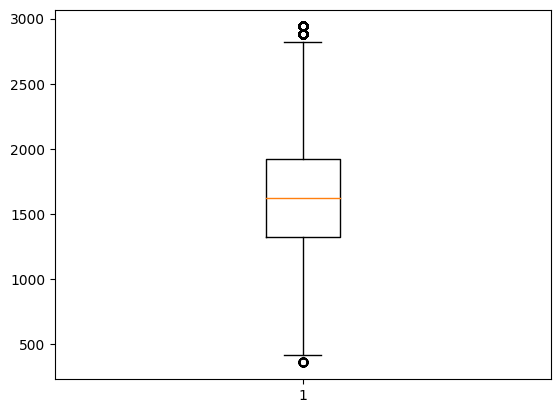

In [193]:

plt.boxplot(rota['Segundos'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


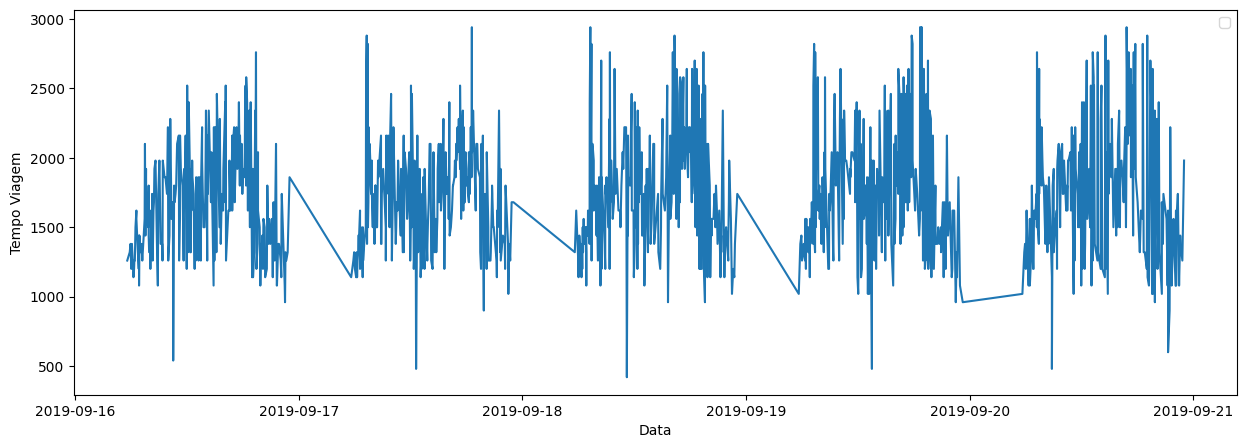

In [206]:
rota['DataInicio'] = rota.apply(lambda x: dt.datetime.combine(x['DataIni'],x['HoraIni']),axis=1)

rota["DataInicio"] = pd.to_datetime(rota["DataInicio"])
rota = rota.sort_values(by=["DataInicio"], ascending=False)

plt.figure(figsize=(15, 5))

plt.xlabel("Data")
plt.ylabel("Tempo Viagem")

rota = rota[(rota["DataInicio"] > "2019-09-15") & (rota["DataInicio"] < "2019-09-21")]


plt.plot(rota["DataInicio"], rota["Segundos"], color="#1f77b4")


plt.legend()
plt.show()

In [203]:
rota[(rota["DataIni"] == "2019-09-16")]

,DataIni,HoraIni,DataFim,HoraFim,Sentido,Linha,NoVeículo,DuraçãoViagem,TotalGiros,KmPerc,Segundos
117023,2019-09-16,10:29:00,2019-09-16,10:56:00,Ida,410,45190,00:27:00,0,10.534,1620.0
117022,2019-09-16,10:20:00,2019-09-16,10:46:00,Ida,410,50395,00:26:00,0,10.534,1560.0
117012,2019-09-16,08:19:00,2019-09-16,08:40:00,Ida,410,50382,00:21:00,0,10.534,1260.0
117005,2019-09-16,07:36:00,2019-09-16,08:08:00,Ida,410,5162,00:32:00,0,10.534,1920.0
117024,2019-09-16,10:31:00,2019-09-16,10:40:00,Ida,410,45191,00:09:00,0,10.534,540.0
...,...,...,...,...,...,...,...,...,...,...,...
117037,2019-09-16,12:27:00,2019-09-16,12:59:00,Ida,410,50395,00:32:00,0,10.534,1920.0
117038,2019-09-16,12:35:00,2019-09-16,13:06:00,Ida,410,45203,00:31:00,0,10.534,1860.0
117036,2019-09-16,12:25:00,2019-09-16,12:47:00,Ida,410,45191,00:22:00,0,10.534,1320.0
117040,2019-09-16,12:51:00,2019-09-16,13:18:00,Ida,410,45194,00:27:00,0,10.534,1620.0


In [196]:
def outlier_metric2(valores):
    Q1 = np.percentile(valores,25)
    Q3 = np.percentile(valores,75)
    intervalo = Q3-Q1
    limite_superior = Q3+intervalo*1.5
    limite_inferior = Q1-intervalo*1.5
    return Q1,Q3,intervalo,limite_superior,limite_inferior
v = outlier_metric2(rota['Segundos'])
v


(1380.0, 1980.0, 600.0, 2880.0, 480.0)

In [197]:
rota.loc[rota['Segundos']>1320]

,DataIni,HoraIni,DataFim,HoraFim,Sentido,Linha,NoVeículo,DuraçãoViagem,TotalGiros,KmPerc,Segundos
116600,2019-09-20,16:17:00,2019-09-20,16:50:00,Ida,410,50385,00:33:00,0,10.534,1980.0
116543,2019-09-20,07:28:00,2019-09-20,08:06:00,Ida,410,5157,00:38:00,0,10.534,2280.0
116544,2019-09-20,07:40:00,2019-09-20,08:11:00,Ida,410,5162,00:31:00,0,10.534,1860.0
116545,2019-09-20,07:43:00,2019-09-20,08:13:00,Ida,410,45203,00:30:00,0,10.534,1800.0
116546,2019-09-20,07:51:00,2019-09-20,08:22:00,Ida,410,5151,00:31:00,0,10.534,1860.0
...,...,...,...,...,...,...,...,...,...,...,...
117039,2019-09-16,12:43:00,2019-09-16,13:12:00,Ida,410,45190,00:29:00,0,10.534,1740.0
117037,2019-09-16,12:27:00,2019-09-16,12:59:00,Ida,410,50395,00:32:00,0,10.534,1920.0
117038,2019-09-16,12:35:00,2019-09-16,13:06:00,Ida,410,45203,00:31:00,0,10.534,1860.0
117040,2019-09-16,12:51:00,2019-09-16,13:18:00,Ida,410,45194,00:27:00,0,10.534,1620.0


In [198]:
rota['Segundos'].mean()

1715.7247706422017